## Proceso EDA (Analisis Exploratorio de Datos)

En este reporte se llevará a cabo una exploración detallada sobre los datos de Google. La meta principal consiste en comprender la organización de estos datos, detectar posibles patrones y recopilar información significativa que pueda servir como guía para tal vez hacer un posible dashboard a futuro.

### Importacion de Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Desactivar los warnings
warnings.filterwarnings("ignore")

### Lectura de Datos

In [3]:
# Configurar la opción de visualización para evitar notación científica
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df_google = pd.read_csv('Google-CF.csv')

### Estructura de el DataFrame

Visualizamos las primeras filas de el DataFrame

In [27]:
df_google.head(3)

,user_id,name_x,rating,text,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews
0,114566479906039726080,Karen Peacock,5,The Tuesday trivia night and Rock n' Roll Bing...,0x889a43f81e27b2a1:0x76ac4d38601d38e9,Lake Forest Yacht Club Restaurant,"Lake Forest Yacht Club Restaurant, 1 Yacht Clu...",31,-88,['Restaurant'],5,8
1,106418352751645261824,Zipperand Stitch,3,"Food is good, but I really wish dine is was op...",0x886243f0a950225d:0x1368e71fd73bd654,Taco Bell,"Taco Bell, 5809 AL-53, Harvest, AL 35749",35,-87,"['Fast food restaurant', 'Breakfast restaurant...",3,17
2,113243641929038086144,Juanita Grooms,3,Was good,0x88902db1a8104401:0xe2a36f2caef61f24,Tiny Diner,"Tiny Diner, 417 Liberty Hill Dr, Evergreen, AL...",31,-87,"['Cafe', 'Gas station', 'Grocery store']",4,34


### Tipos de datos

In [5]:
print("\nTipos de datos:")
df_google.dtypes # Muestra los tipos de datos de cada columna


Tipos de datos:


user_id           float64
name_x             object
rating              int64
text               object
gmap_id            object
name_y             object
address            object
latitude          float64
longitude         float64
category           object
avg_rating        float64
num_of_reviews      int64
dtype: object

### Valores nulos

In [6]:
print("\nPorcentaje de valores nulos en 'df_google':")
porcentaje_nulos_google = (df_google.isnull().sum() / df_google.shape[0]) * 100
print(round(porcentaje_nulos_google, 2).astype(str) + ' %') # Muestra la cantidad de valores nulos por columna


Porcentaje de valores nulos en 'df_google':
user_id           0.0 %
name_x            0.0 %
rating            0.0 %
text              0.0 %
gmap_id           0.0 %
name_y            0.0 %
address           0.0 %
latitude          0.0 %
longitude         0.0 %
category          0.0 %
avg_rating        0.0 %
num_of_reviews    0.0 %
dtype: object


### Cantidad de filas y columnas

In [7]:
# Cantidad de filas y columnas en el dataframe 'df_google'
print("Cantidad de filas y columnas en el dataframe 'df_google':", df_google.shape)

Cantidad de filas y columnas en el dataframe 'df_google': (82270, 12)


### Filas duplicadas

In [8]:
# Verificar y mostrar la cantidad de duplicados en el dataframe 'df_google'
duplicados_google = df_google.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'df_google':", duplicados_google)

Cantidad de duplicados en el dataframe 'df_google': 0


### Estadistica descriptiva

In [9]:
df_google.drop(columns=['user_id','latitude','longitude']).describe()

,rating,avg_rating,num_of_reviews
count,82270,82270,82270
mean,4,4,142
std,1,0,341
min,1,1,5
25%,4,4,34
50%,5,4,57
75%,5,5,104
max,5,5,9998


- Viendo esta informacion vemos que contamos con 82.270 registros validos en el Dataframe.
- En cuanto a los Ratings tenemos los siguientes datos : 
   - La calificación mínima es 1, la calificación máxima es 5.
   - La calificación promedio es de 4, con una mediana de 5.
   - El 25% de las calificaciones son 4 o menos, el 50% son 5 y el 75% son 5. Esto sugiere que la mayoría de las calificaciones están en el rango superior.
- En cuanto al numero de reviews tenemos los siguientes datos: 
   - El promedio del número de reseñas es de 4, con una desviación estándar de 0.
   - La cantidad mínima de reseñas es 5, mientras que la máxima es 9998.
   - El 25% de los productos tienen al menos 34 reseñas, el 50% tienen al menos 57 reseñas y el 75% tienen al menos 104 reseñas. Esto indica una distribución sesgada hacia productos con más reseñas.

## Visualizaciones

### Gráfico de Barras de Distribución de Calificaciones

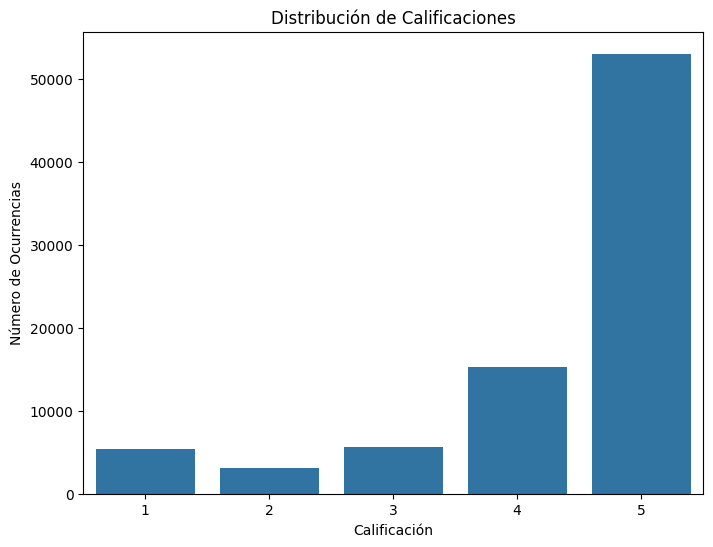

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_google)
plt.xlabel('Calificación')
plt.ylabel('Número de Ocurrencias')
plt.title('Distribución de Calificaciones')
plt.show()

- Viendo estos datos podemos determinar que la gran mayoria de calificaciones corresponden al numero 5, seguida por la numero 4.
- Un dato interesante que podemos observar es que teniendo 82.270 datos, menos de 10.000 corresponden a calificaciones malas por debajo de 4.

### Gráfico de Barras de Calificaciones Promedio

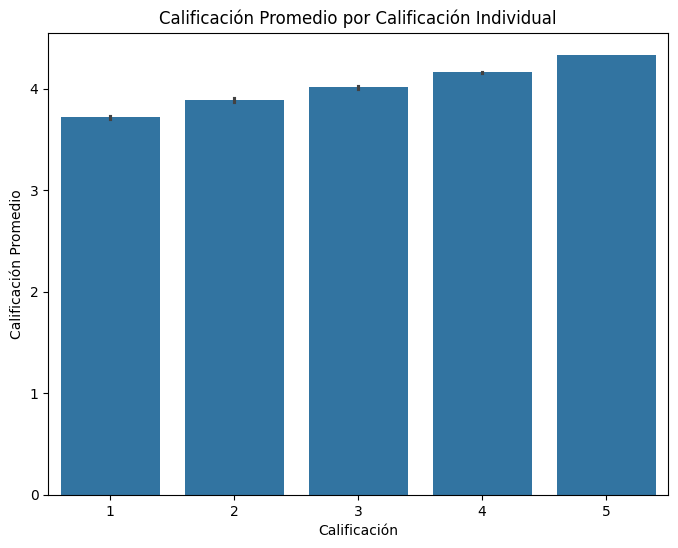

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='avg_rating', data=df_google)
plt.xlabel('Calificación')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Calificación Individual')
plt.show()


### Gráfico de Barras de Número de Reseñas por Calificación

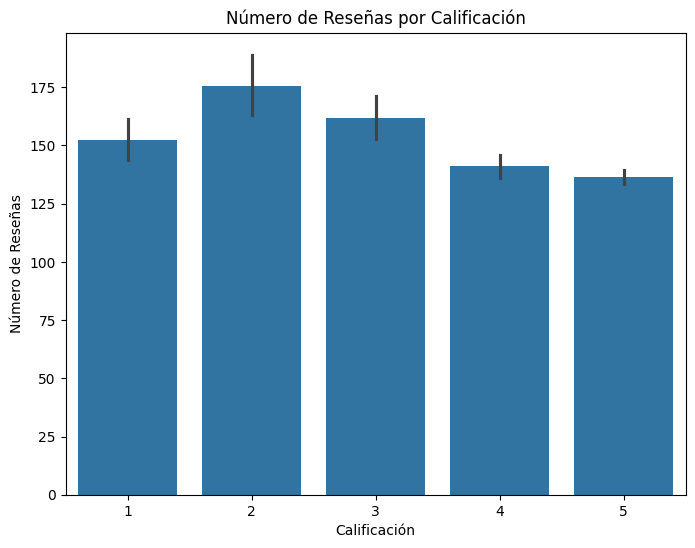

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='num_of_reviews', data=df_google)
plt.xlabel('Calificación')
plt.ylabel('Número de Reseñas')
plt.title('Número de Reseñas por Calificación')
plt.show()


### Gráfico de Barras de Distribución del Número de Reseñas

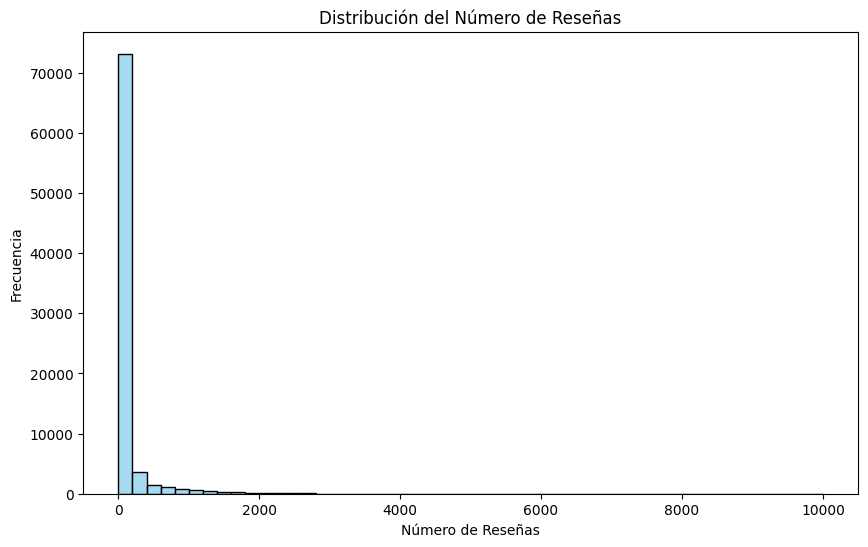

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_google['num_of_reviews'], bins=50, kde=False, color='skyblue')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Reseñas')
plt.show()


### Mapa de calor (heatmap)

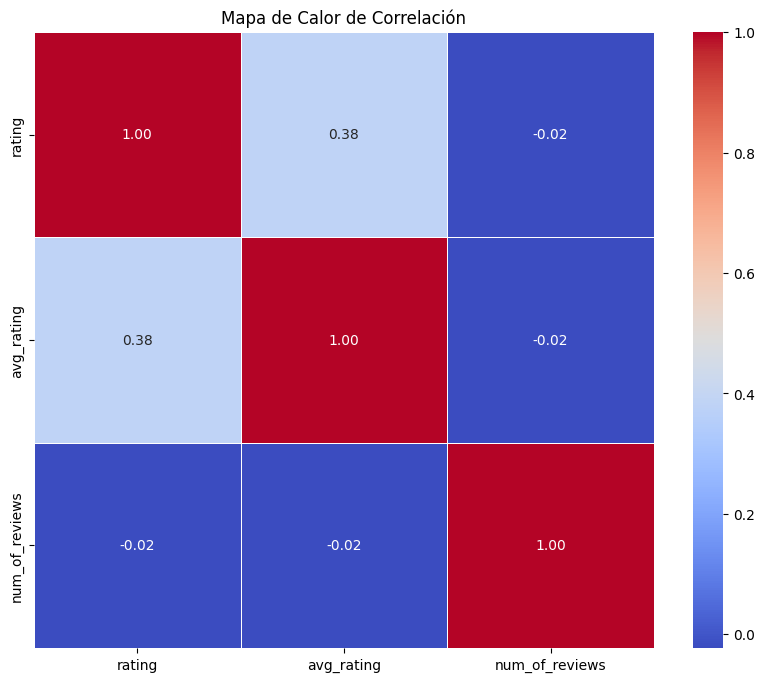

In [26]:
# Selecciona las columnas numéricas relevantes para el mapa de calor
columns_for_heatmap = df_google[['rating', 'avg_rating', 'num_of_reviews']]

# Calcula la matriz de correlación
correlation_matrix = columns_for_heatmap.corr()

# Crea un mapa de calor usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()